In [2]:
#For testing, import the user name
from env import api_key
import requests
import pandas as pd
from bs4 import BeautifulSoup
from env import api_key
from time import sleep
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
from acquire import *
from prepare import *

pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.reset_option("display.max_rows", "display.max_columns")

import re

In [3]:
df_10 = pd.read_csv('final_10.csv')

In [4]:
df_10.drop(columns = ['Unnamed: 0'],inplace = True)

In [5]:
df = df_10

In [6]:
train,test = prepare(df)

In [7]:
df = train

In [9]:
df['BlueTeamLevelDifference'] = df.BlueTeamLevel - df.RedTeamLevel
df['BlueTeamXpDifference'] = df.BlueTeamXp - df.RedTeamXp
df['BlueTeamWardDifference'] = df.BlueTeamWards - df.RedTeamWards
df['blueteam_win'] = df['winningTeam'] == 100
df['BlueTeamDeathDifference'] = (df.deathsplayer_1 +
                                    df.deathsplayer_2 +
                                    df.deathsplayer_3 +
                                    df.deathsplayer_4 +
                                    df.deathsplayer_5) - (df.deathsplayer_6 +
                                    df.deathsplayer_7 +
                                    df.deathsplayer_8 +
                                    df.deathsplayer_9 +
                                    df.deathsplayer_10)
df['BlueTeamminionKillDifference'] = df.BlueTeamJungleMinionsKilled - df.RedTeamJungleMinionsKilled
df['BlueTeamDeathsDifference'] = df.BlueTeamDeaths - df.RedTeamDeaths
df['BlueTeamMagicDmgDifference'] = df.BlueTeamMagicDamageDoneToChampions - df.RedTeamMagicDamageDoneToChampions
df['BlueTeamPhysicalDmgDifference'] = df.BlueTeamPhysicalDamageDoneToChampions - df.RedTeamPhysicalDamageDoneToChampions
df['BlueTeamTrueDmgDifference'] = df.BlueTeamTrueDamageDoneToChampions - df.RedTeamTrueDamageDoneToChampions
df['BlueTeamTotalDmgDifference'] = df.BlueTeamTotalDamageDoneToChampions - df.RedTeamTotalDamageDoneToChampions
df['BlueTeamTotalMinionsMonstersDifference'] = ((df.BlueTeamMinionsKilled + df.BlueTeamJungleMinionsKilled) - 
                                (df.RedTeamMinionsKilled + df.RedTeamJungleMinionsKilled))
df['BlueTeamTimeCCingDifference'] = df.BlueTeamTimeEnemySpentControlled - df.RedTeamTimeEnemySpentControlled
df['BlueteamWardDifference'] = df.BlueTeamWards - df.RedTeamWards
df['BlueteamAssistDifference'] = df.BlueTeamAssists - df.RedTeamAssists



In [ ]:
df = df['BlueTeamXpDifference','BlueTeamLevelDifference','BlueTeamWardDifference',
       'blueteam_win','BlueTeamDeathDifference','BlueTeamminionKillDifference',
       'BlueTeamDeathsDifference','BlueTeamMagicDmgDifference','BlueTeamPhysicalDmgDifference',
       'BlueTeamTrueDmgDifference','BlueTeamTotalDmgDifference','BlueTeamTotalMinionsMonstersDifference',
       'BlueTeamTimeCCingDifference','BlueteamWardDifference','BlueteamAssistDifference']

In [21]:
train.head(1)

airdragon_team100  assistsplayer_1  assistsplayer_10  assistsplayer_2  \
3513                0.0              1.0               0.0              1.0   

      assistsplayer_3  assistsplayer_4  assistsplayer_5  assistsplayer_6  \
3513              1.0              4.0              2.0              1.0   

      assistsplayer_7  assistsplayer_8  assistsplayer_9  \
3513              0.0              0.0              1.0   

      chemtechdragon_team100  currentGold_1  currentGold_10  currentGold_2  \
3513                     0.0         1109.0           209.0         1601.0   

      currentGold_3  currentGold_4  currentGold_5  currentGold_6  \
3513          249.0          725.0          939.0          759.0   

      currentGold_7  currentGold_8  currentGold_9  deathsplayer_1  \
3513          159.0         2862.0          753.0             1.0   

      deathsplayer_10  deathsplayer_2  deathsplayer_3  deathsplayer_4  \
3513              3.0             0.0             1.0             1.0   

      deathsplayer_5  deathsplayer_6  deathsplayer_7  deathsplayer_8  \
3513             1.0             1.0             2.0             1.0   

      deathsplayer_9  dragon_team100  dragon_team200  earthdragon_team100  \
3513             1.0             1.0             0.0                  0.0   

      earthdragon_team200  firedragon_team100  firedragon_team200  \
3513                  0.0                 1.0                 0.0   

      gameDuration  gameEndTimestamp      gameId gameMode  \
3513          2168     1637224740422  4107781904  CLASSIC   

                          gameName  gameStartTimestamp      gameType  \
3513  teambuilder-match-4107781904       1637222572040  MATCHED_GAME   

        gameVersion  goldPerSecond_1  goldPerSecond_10  goldPerSecond_2  \
3513  11.23.409.111              0.0               0.0              0.0   

      goldPerSecond_3  goldPerSecond_4  goldPerSecond_5  goldPerSecond_6  \
3513              0.0              0.0             30.0             20.0   

      goldPerSecond_7  goldPerSecond_8  goldPerSecond_9  \
3513              0.0              0.0              0.0   

      hextechdragon_team100  hextechdragon_team200  jungleMinionsKilled_1  \
3513                    0.0                    0.0                   54.0   

      jungleMinionsKilled_10  jungleMinionsKilled_2  jungleMinionsKilled_3  \
3513                    44.0                    0.0                    0.0   

      jungleMinionsKilled_4  jungleMinionsKilled_5  jungleMinionsKilled_6  \
3513                    0.0                    0.0                    0.0   

      jungleMinionsKilled_7  jungleMinionsKilled_8  jungleMinionsKilled_9  \
3513                    0.0                    0.0                    0.0   

      killsplayer_1  killsplayer_10  killsplayer_2  killsplayer_3  \
3513            2.0             2.0            2.0            2.0   

      killsplayer_4  killsplayer_5  killsplayer_6  killsplayer_7  \
3513            1.0            1.0            0.0            1.0   

      killsplayer_8  killsplayer_9  level_1  level_10  level_2  level_3  \
3513            1.0            0.0      7.0       6.0      7.0      8.0   

      level_4  level_5  level_6  level_7  level_8  level_9  \
3513      7.0      7.0      4.0      7.0      8.0      5.0   

      magicDamageDoneToChampions_1  magicDamageDoneToChampions_10  \
3513                         220.0                         1149.0   

      magicDamageDoneToChampions_2  magicDamageDoneToChampions_3  \
3513                          56.0                        3244.0   

      magicDamageDoneToChampions_4  magicDamageDoneToChampions_5  \
3513                         464.0                         434.0   

      magicDamageDoneToChampions_6  magicDamageDoneToChampions_7  \
3513                        1760.0                           0.0   

      magicDamageDoneToChampions_8  magicDamageDoneToChampions_9  \
3513                        2283.0                           0.0   

    

In [12]:
train = train['BlueTeamWin',
              'chemtechdragon_team100',
             'dragon_team100',
             'BlueTeamDeathDifference',
             'dragon_team100',
             'dragon_team200',
             'earthdragon_team100',
             'earthdragon_team200',
             'firedragon_team100',
             'firedragon_team200',
             'gameDuration',
             'hextechdragon_team100',
             'hextechdragon_team200',
              'BlueTeamMonsterKillDifference',
              'RedTeamMonstersKilled',
              'BlueTeamMonstersKilled',
              'BlueTeamDeathDifference',
              'waterdragon_team100',
              'chemtechdragon_team200',
              'riftherald_team200',
              'airdragon_team200',
              'waterdragon_team200',
              'BlueTeamDeaths',
              'RedTeamDeaths',
              'BlueTeamKills',
              'RedTeamKills',
              'BlueTeamMagicDamageDoneToChampions',
              'RedTeamMagicDamageDoneToChampions',
              'BlueTeamMinionsKilled',
              'RedTeamMinionsKilled',
              'BlueTeamPhysicalDamageDoneToChampions',
              'RedTeamPhysicalDamageDoneToChampions',
              'BlueTeamTimeEnemySpentControlled',
              'RedTeamTimeEnemySpentControlled',
              'BlueTeamTotalDamageDoneToChampions',
              'RedTeamTotalDamageDoneToChampions',
              'BlueTeamTotalGold',
              'RedTeamTotalGold',
              'BlueTeamTrueDamageDoneToChampions',
              'RedTeamTrueDamageDoneToChampions',
              'BlueTeamWards',
              'RedTeamWards',
              'BlueTeamAssists',
              'RedTeamAssists',
              'BlueTeamXp',
              'RedTeamXp',
              'BlueTeamTotalGoldDifference',
              'BlueTeamMVPKills',
              'BlueTeamLevelDifference',
              'BlueTeamXpDifference',
              'blueteam_win']

airdragon_team100  assistsplayer_1  assistsplayer_10  assistsplayer_2  \
3513                0.0              1.0               0.0              1.0   
1250                0.0              1.0               0.0              0.0   
3532                0.0              1.0               1.0              1.0   
3858                0.0              1.0               6.0              3.0   
528                 0.0              1.0               2.0              2.0   
...                 ...              ...               ...              ...   
1593                0.0              3.0               2.0              1.0   
4060                0.0              2.0               5.0              1.0   
1346                0.0              2.0               2.0              2.0   
3454                0.0              0.0               0.0              1.0   
3582                0.0              0.0               1.0              1.0   

      assistsplayer_3  assistsplayer_4  assistsplayer_5  assistsplayer_6  \
3513              1.0              4.0              2.0              1.0   
1250              3.0              0.0              5.0              0.0   
3532              0.0              1.0              2.0              1.0   
3858              1.0              0.0              4.0              1.0   
528               2.0              3.0              2.0              0.0   
...               ...              ...              ...              ...   
1593              0.0              1.0              5.0              0.0   
4060              0.0              1.0              1.0              0.0   
1346              0.0              2.0              2.0              4.0   
3454              0.0              2.0              3.0              0.0   
3582              0.0              2.0              2.0              1.0   

      assistsplayer_7  assistsplayer_8  assistsplayer_9  \
3513              0.0              0.0              1.0   
1250              3.0              0.0              2.0   
3532              1.0              0.0              0.0   
3858              0.0              0.0              4.0   
528               2.0              1.0              2.0   
...               ...              ...              ...   
1593              2.0              1.0              2.0   
4060              6.0              2.0              0.0   
1346              0.0              2.0              1.0   
3454              1.0              0.0              2.0   
3582              0.0              2.0              1.0   

      chemtechdragon_team100  deathsplayer_1  deathsplayer_10  deathsplayer_2  \
3513                     0.0             1.0              3.0             0.0   
1250                     0.0             0.0              1.0             0.0   
3532                     0.0             2.0              1.0             0.0   
3858                     0.0             1.0              3.0             0.0   
528                      0.0             2.0              4.0             1.0   
...                      ...             ...              ...             ...   
1593                     0.0             1.0              2.0             1.0   
4060                     0.0             2.0              1.0             3.0   
1346                     0.0             5.0              1.0             1.0   
3454                     0.0             1.0              2.0             0.0   
3582                     0.0             1.0              3.0             1.0   

      deathsplayer_3  deathsplayer_4  deathsplayer_5  deathsplayer_6  \
3513             1.0             1.0             1.0             1.0   
1250             1.0             1.0             1.0             1.0   
3532             0.0             1.0             0.0             3.0   
3858             1.0             4.0             3.0             2.0   
528              1.0             3.0             2.0             4.0   
...              ...          

In [13]:
btwin_train = train[train.blueteam_win == True]

1. Top
2. Jungle
3. Mid
4. Bot
5. Support
6. Top
7. Jungle
8. Mid
9. Bot
10. Support

In [14]:
rtwin_train = train[train.blueteam_win == False]

Text(0.5, 1.0, 'Features Correlation With gameDuration')

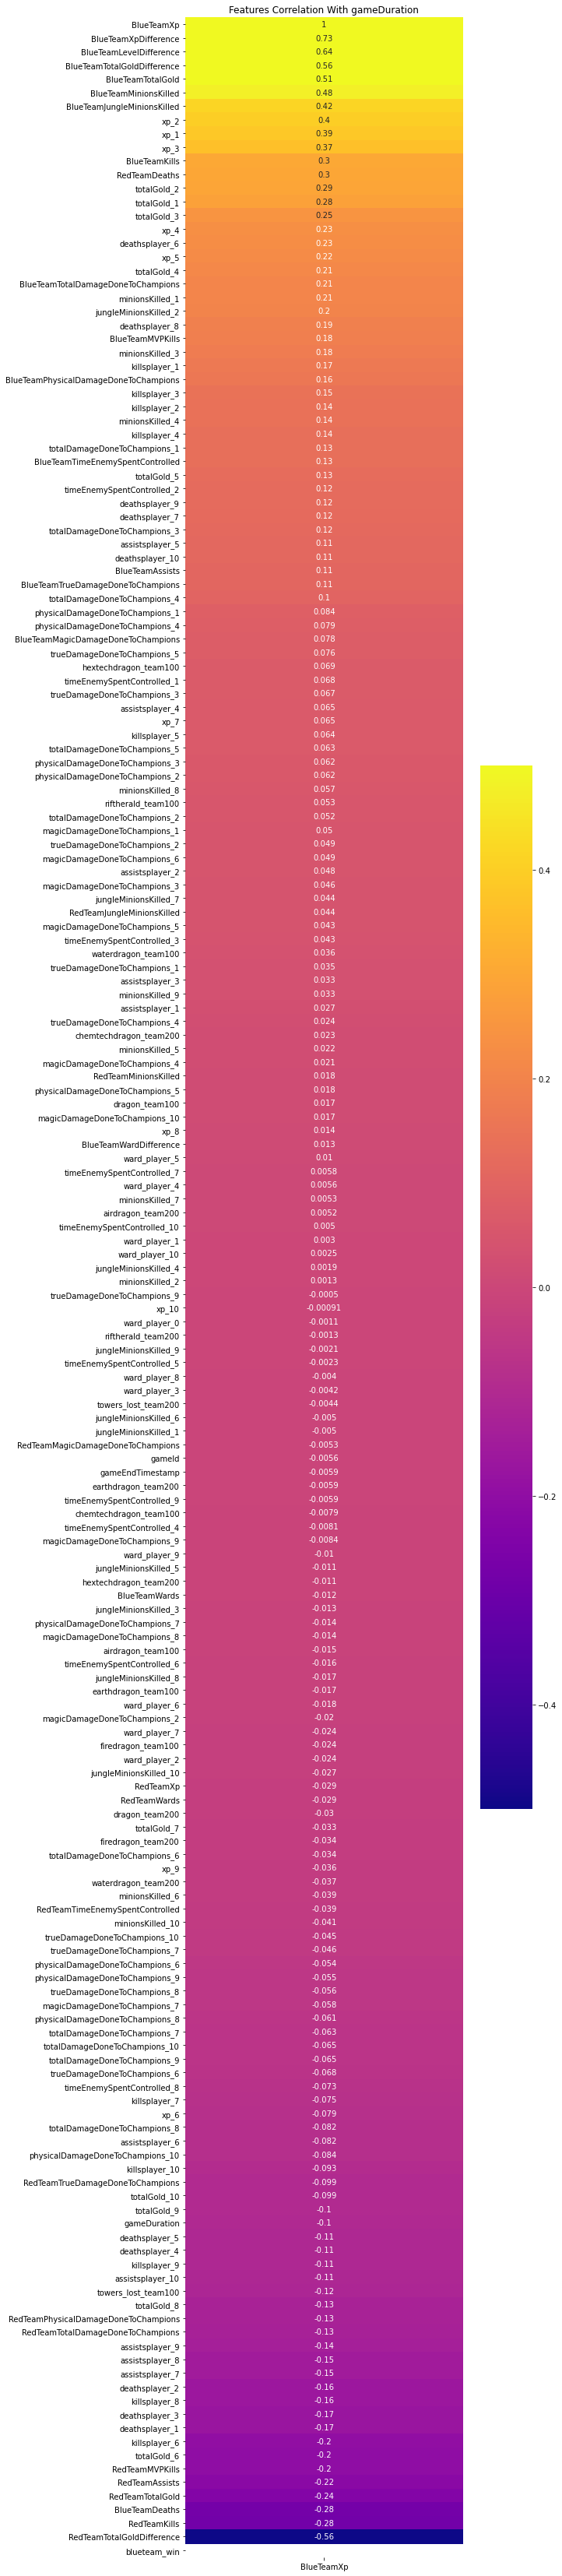

In [27]:
# redteamXP correlation when blue team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(btwin_train.corr()[['BlueTeamXp']].sort_values(by = 'BlueTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

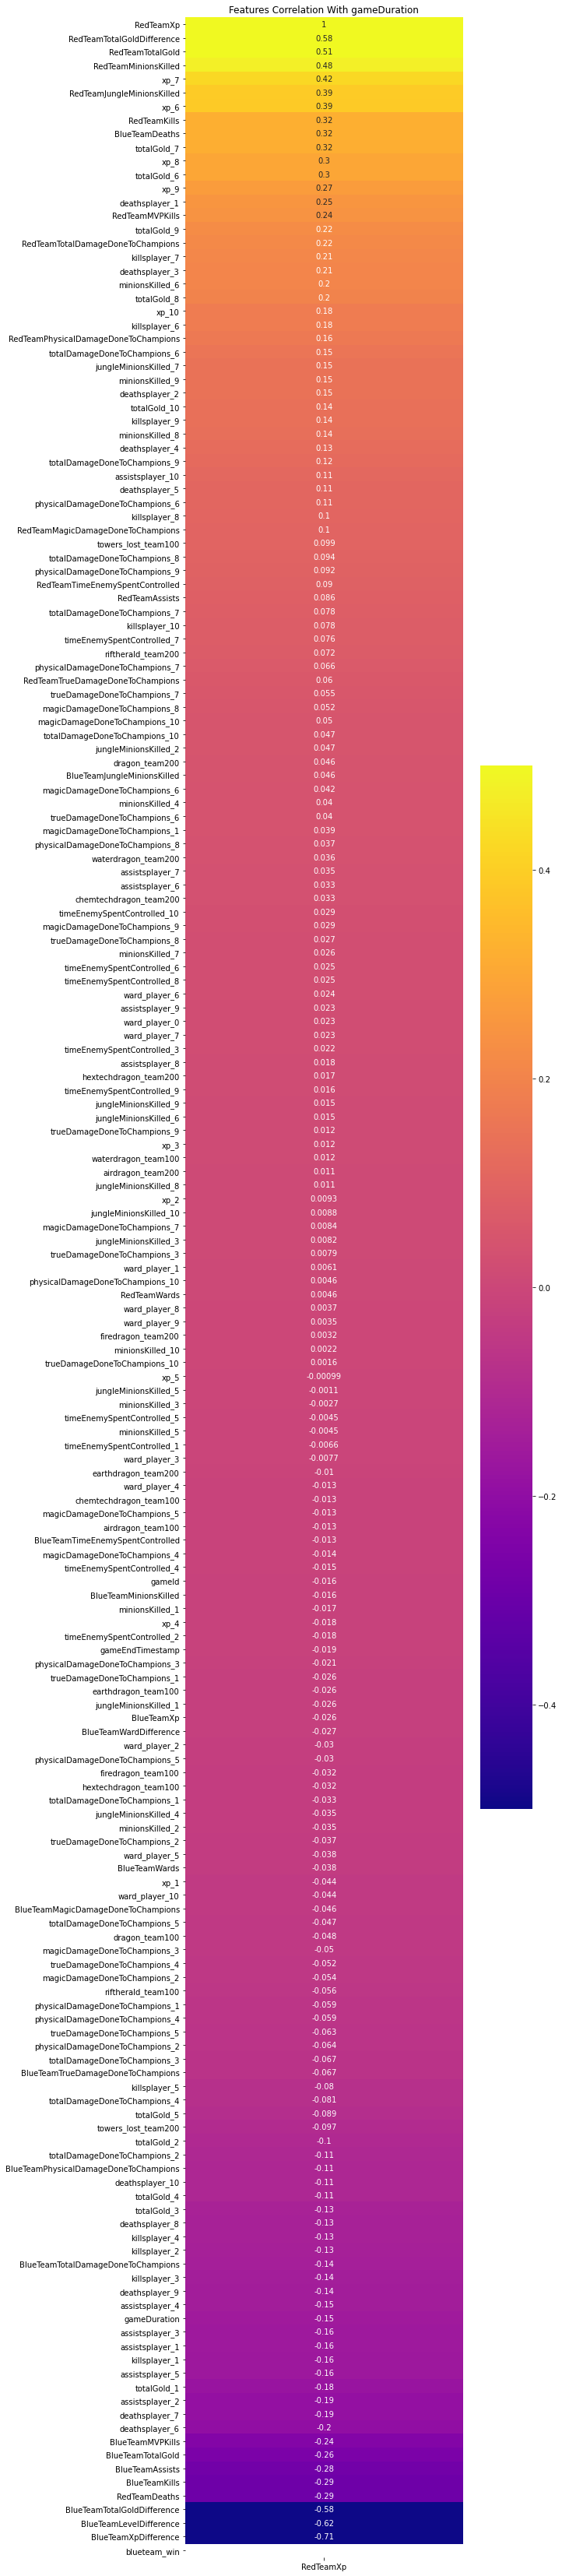

In [28]:
# redteamXP correlation when blue team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(rtwin_train.corr()[['RedTeamXp']].sort_values(by = 'RedTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

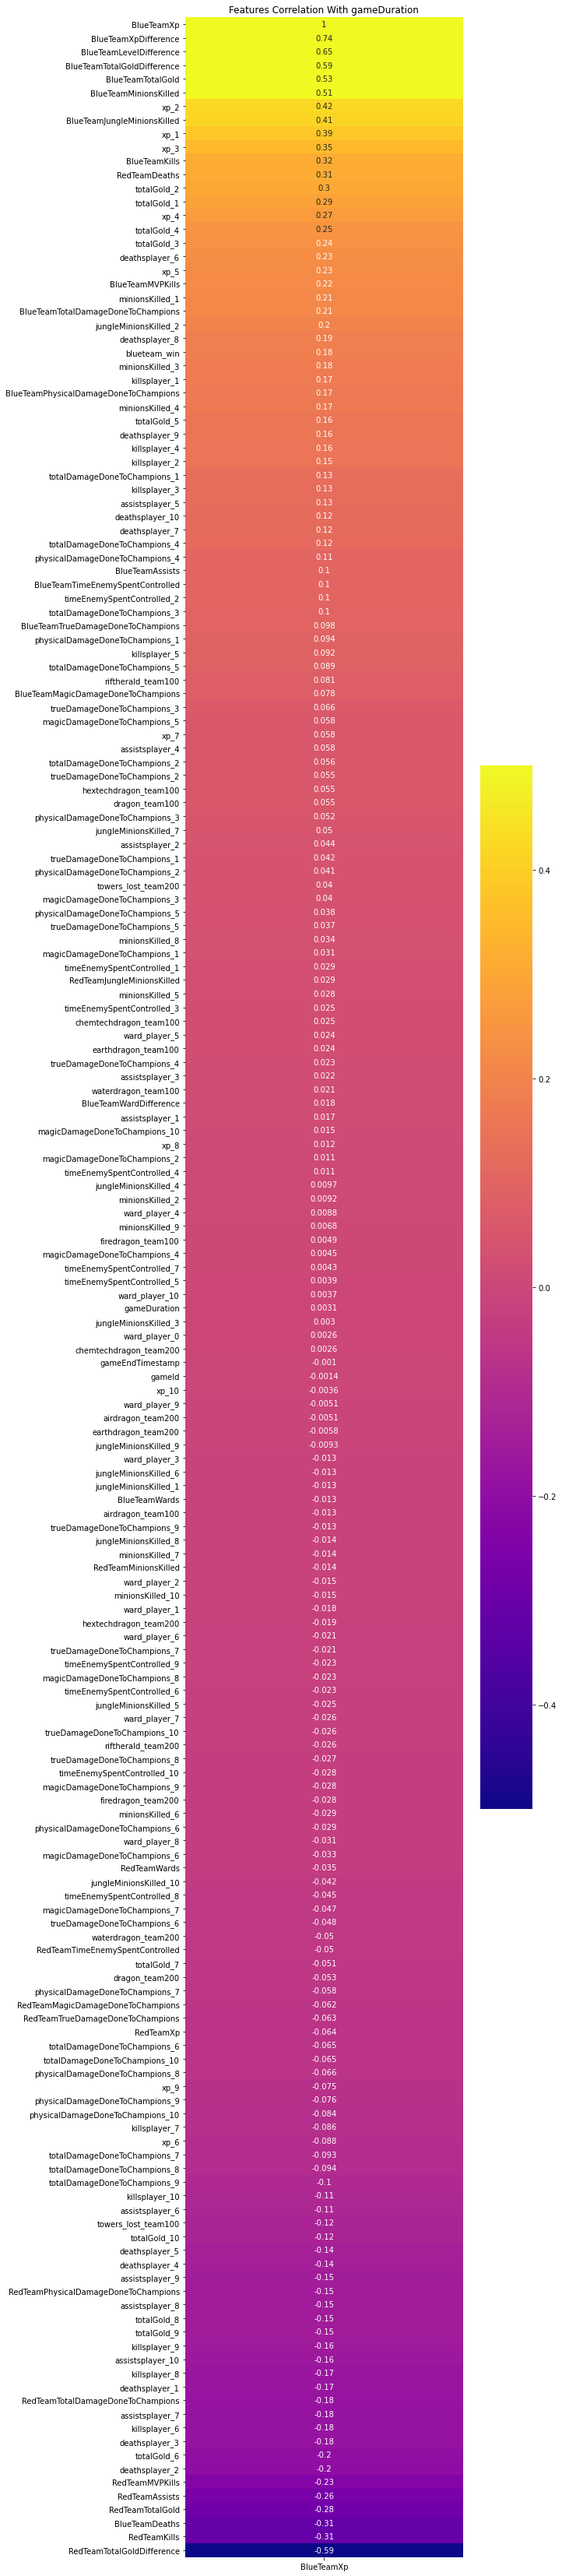

In [29]:
# blueteamXP correlation when blue team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['BlueTeamXp']].sort_values(by = 'BlueTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

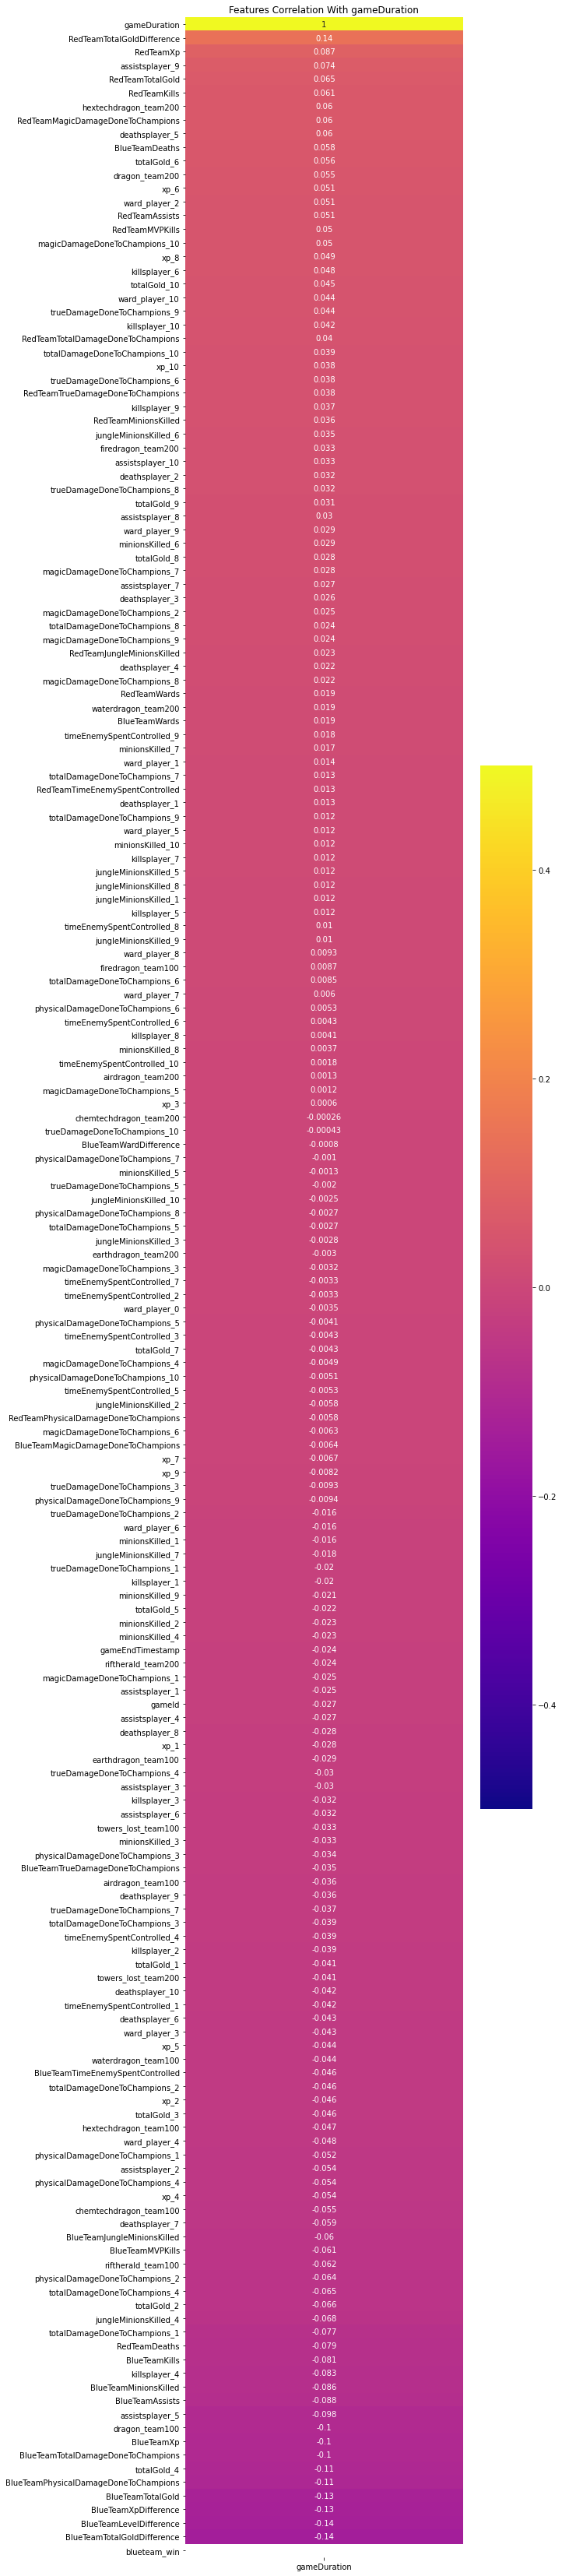

In [15]:
# Game duration correlation when blue team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(btwin_train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

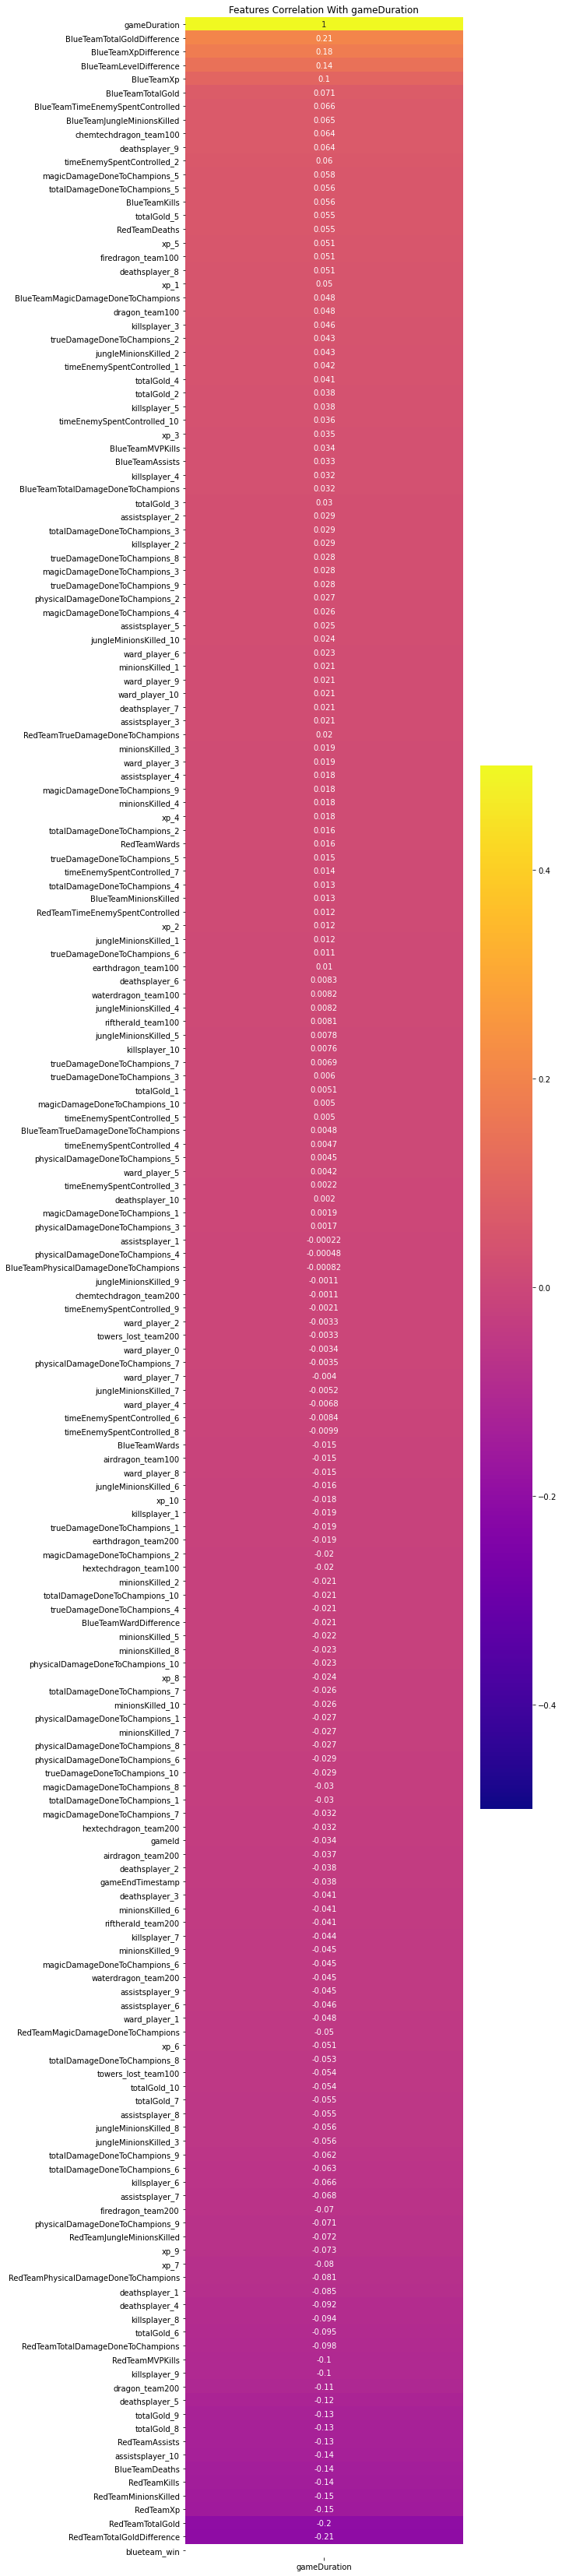

In [16]:
# Game duration correlation when red team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(rtwin_train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

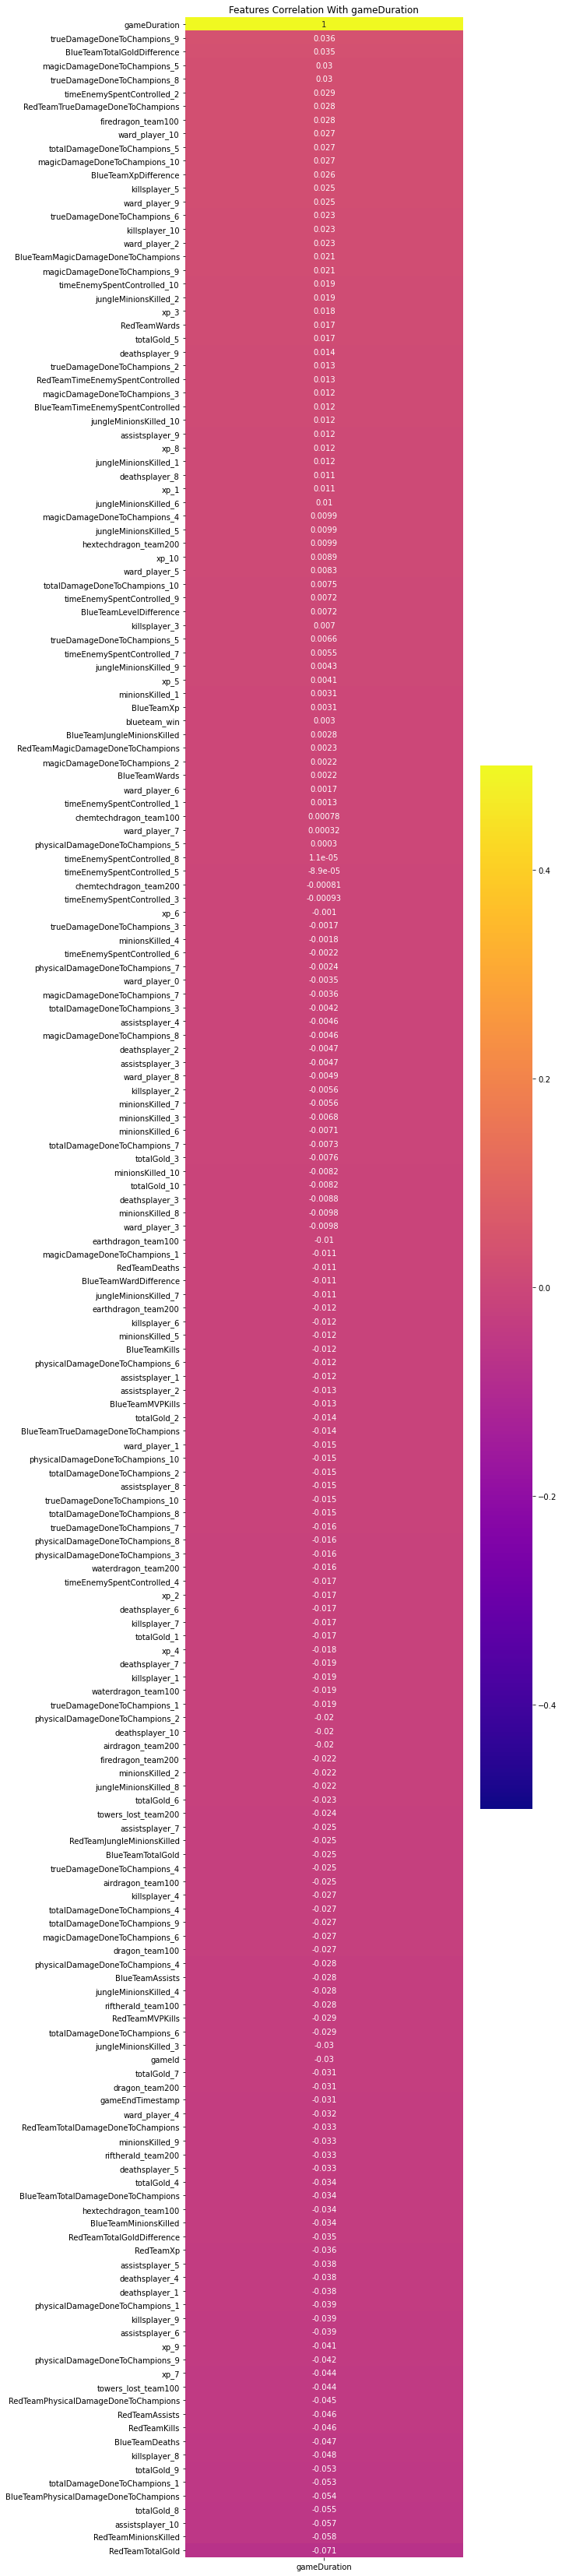

In [17]:
# game duration correlation for both teams
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

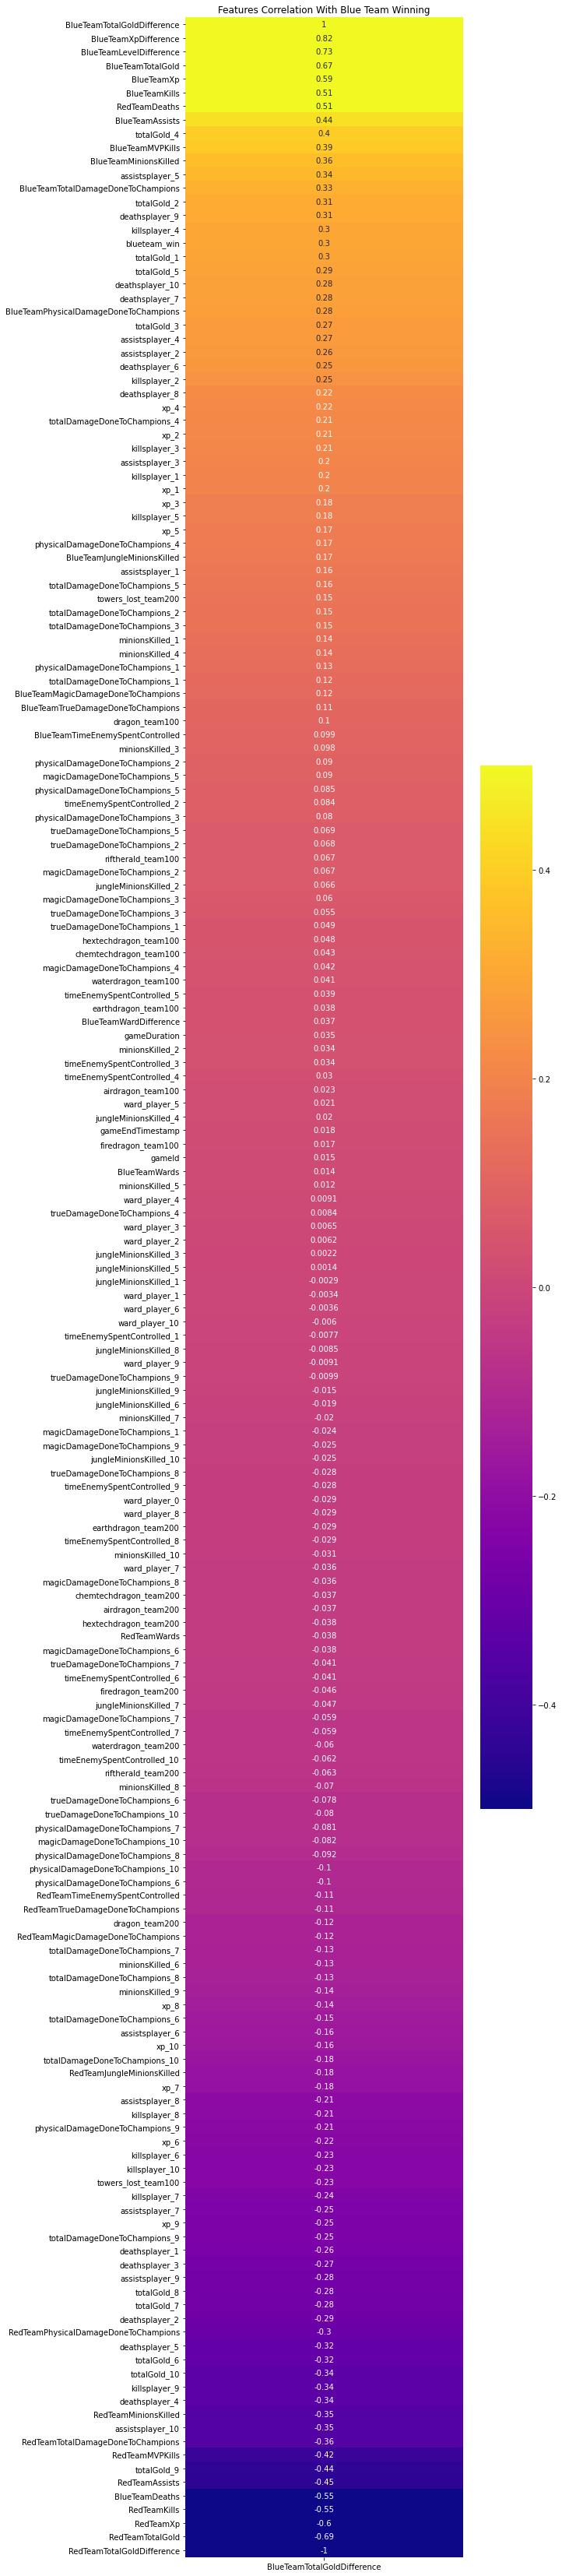

In [18]:
# blue team gold difference correlation
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

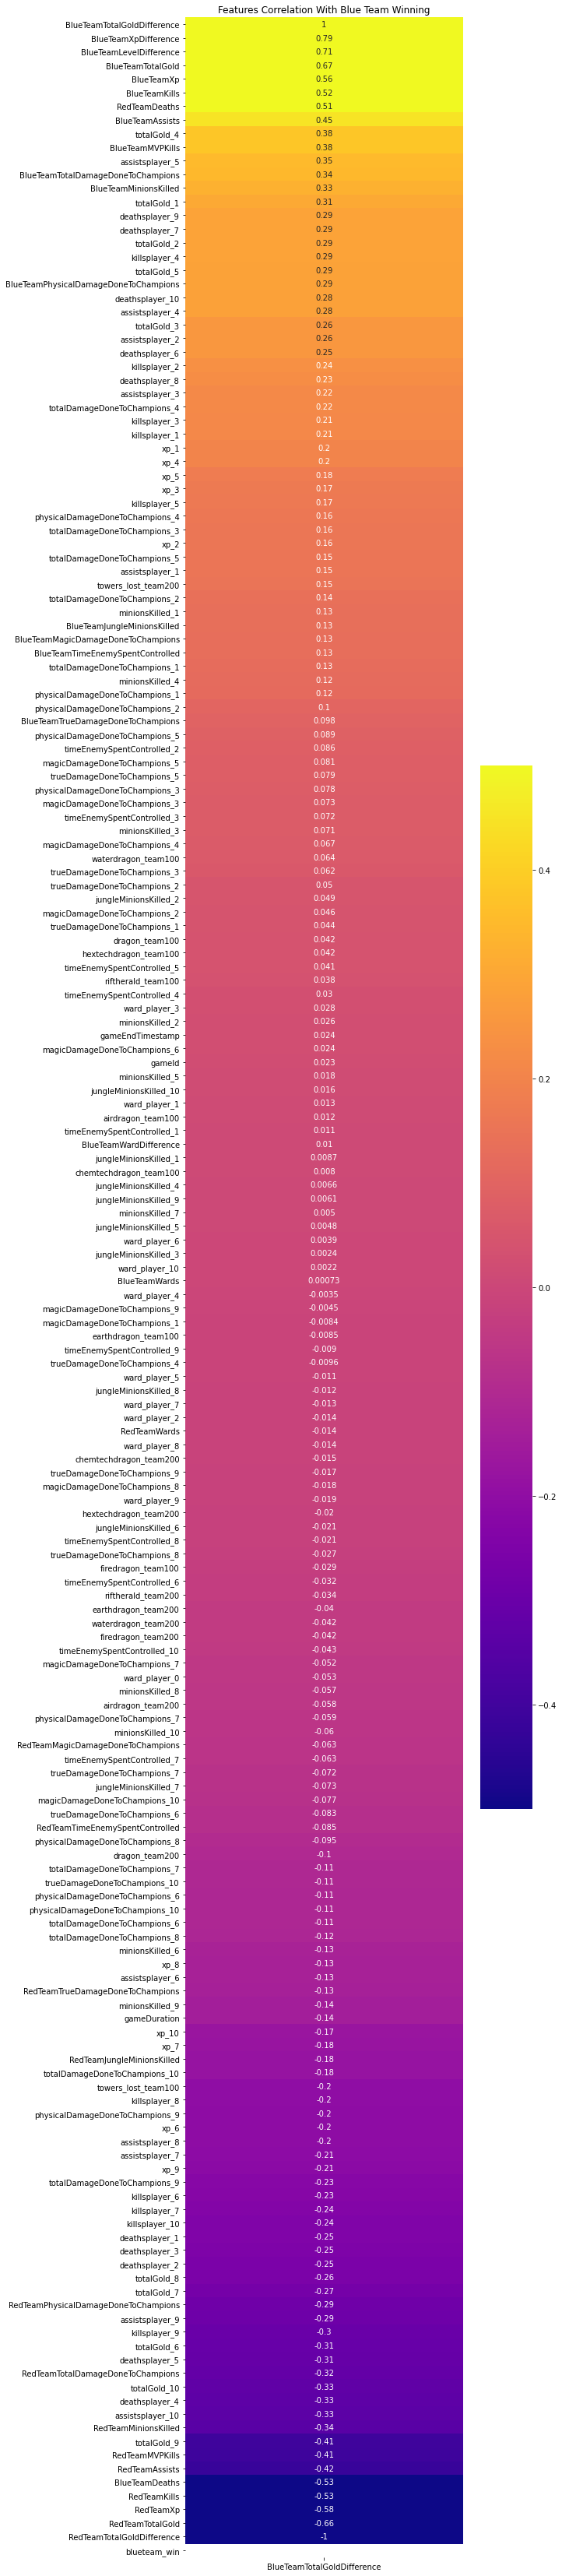

In [19]:

plt.figure(figsize = (8,60))
heatmap = sns.heatmap(btwin_train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

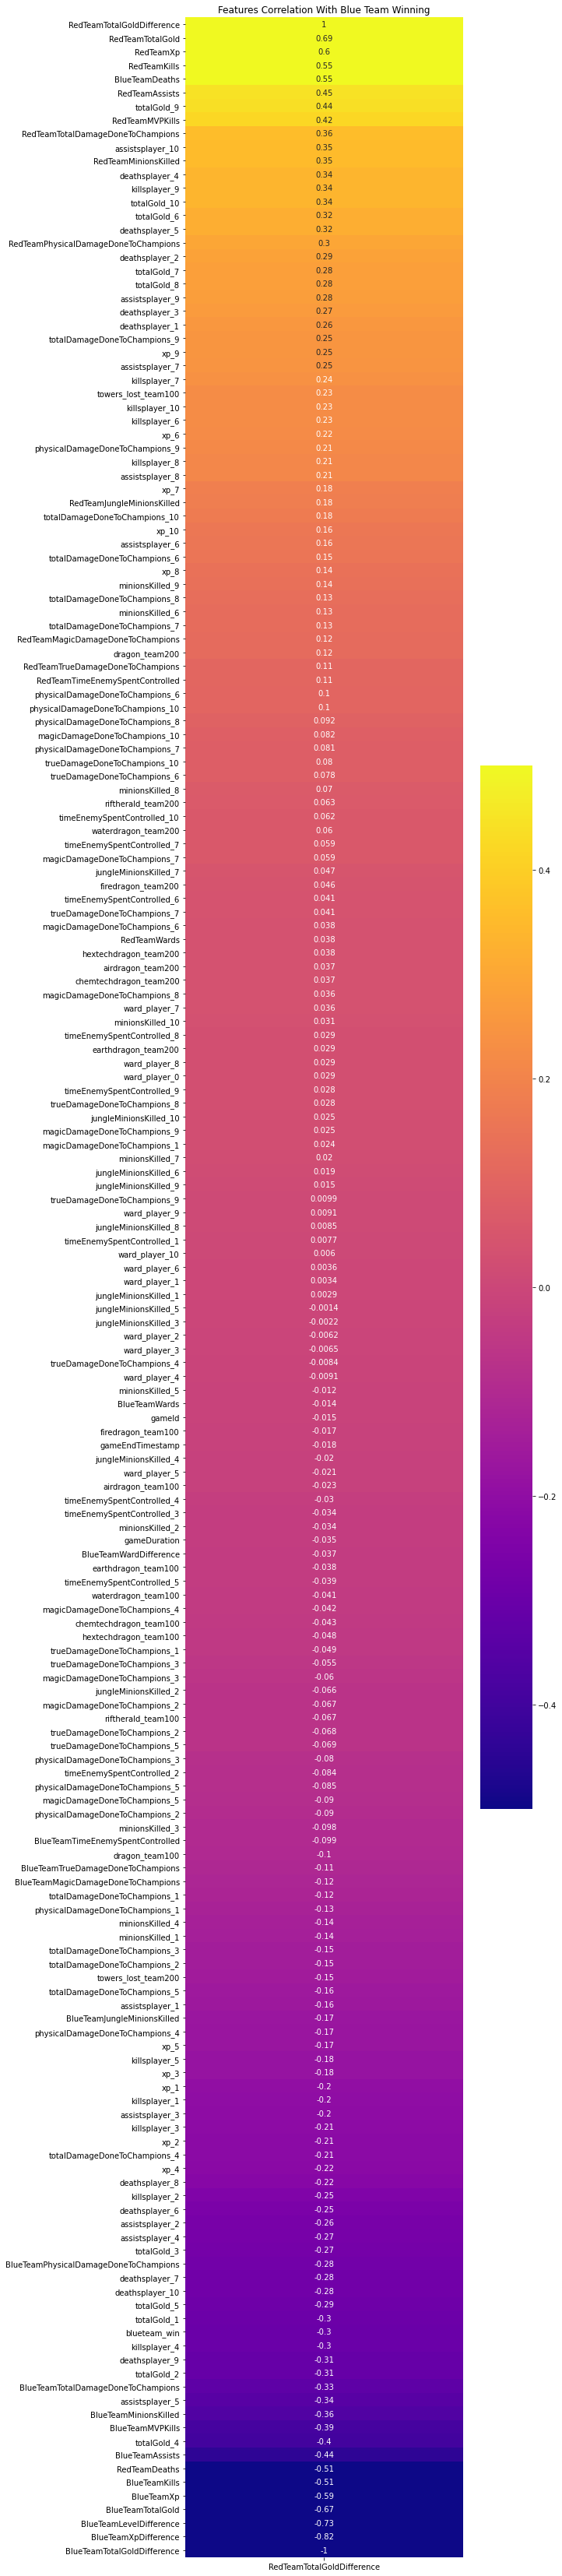

In [20]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['RedTeamTotalGoldDifference']].sort_values(by = 'RedTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

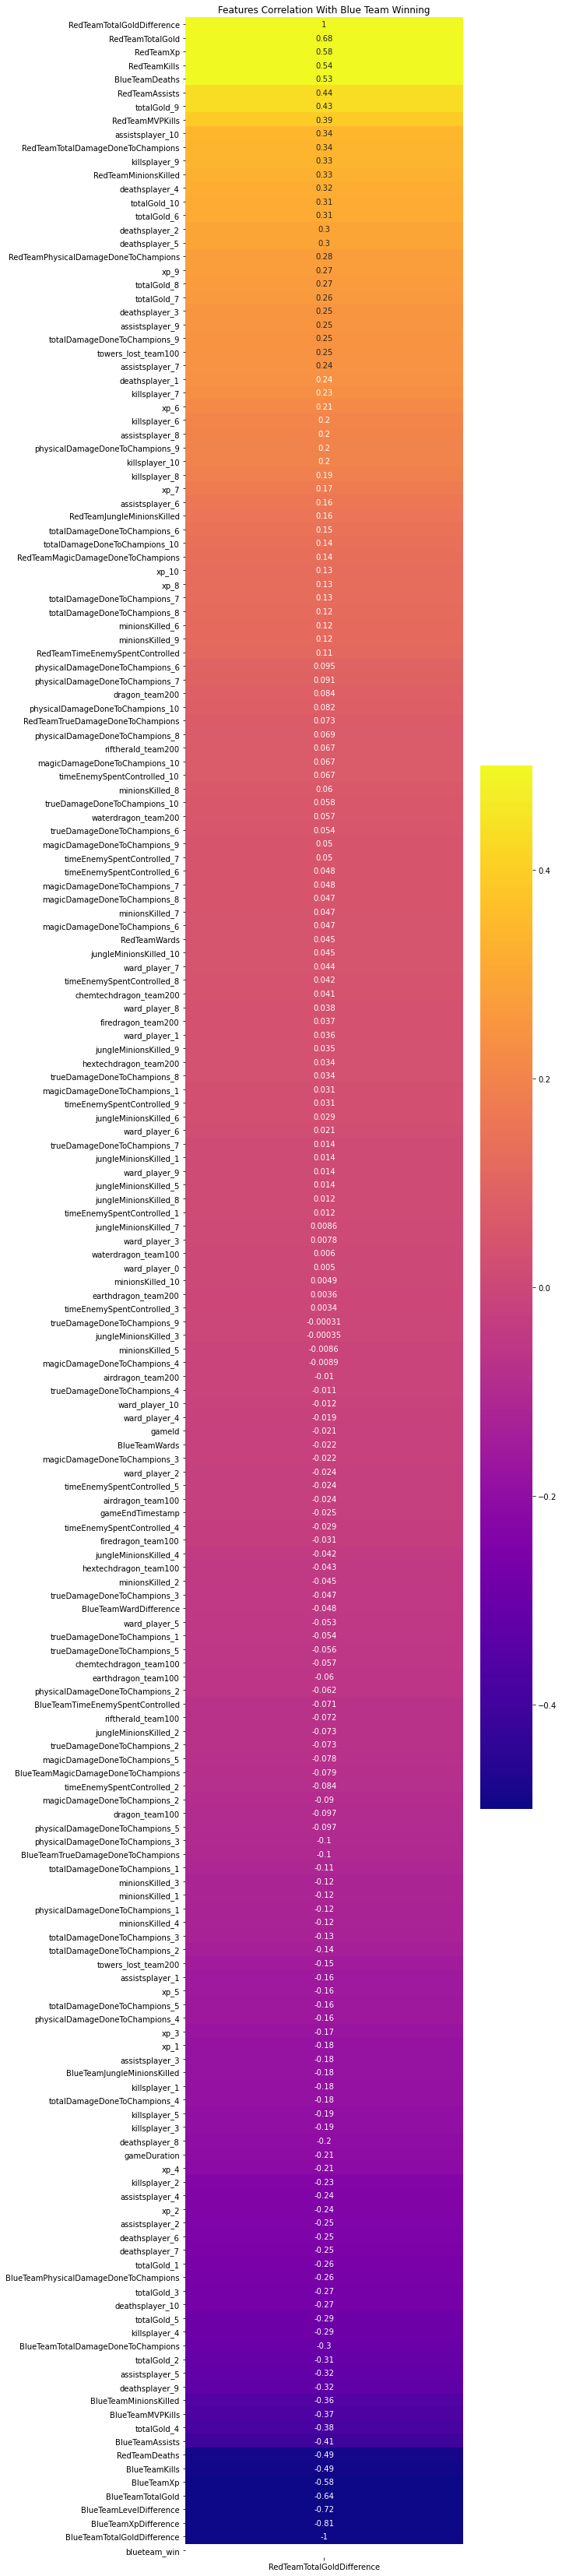

In [22]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(rtwin_train.corr()[['RedTeamTotalGoldDifference']].sort_values(by = 'RedTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

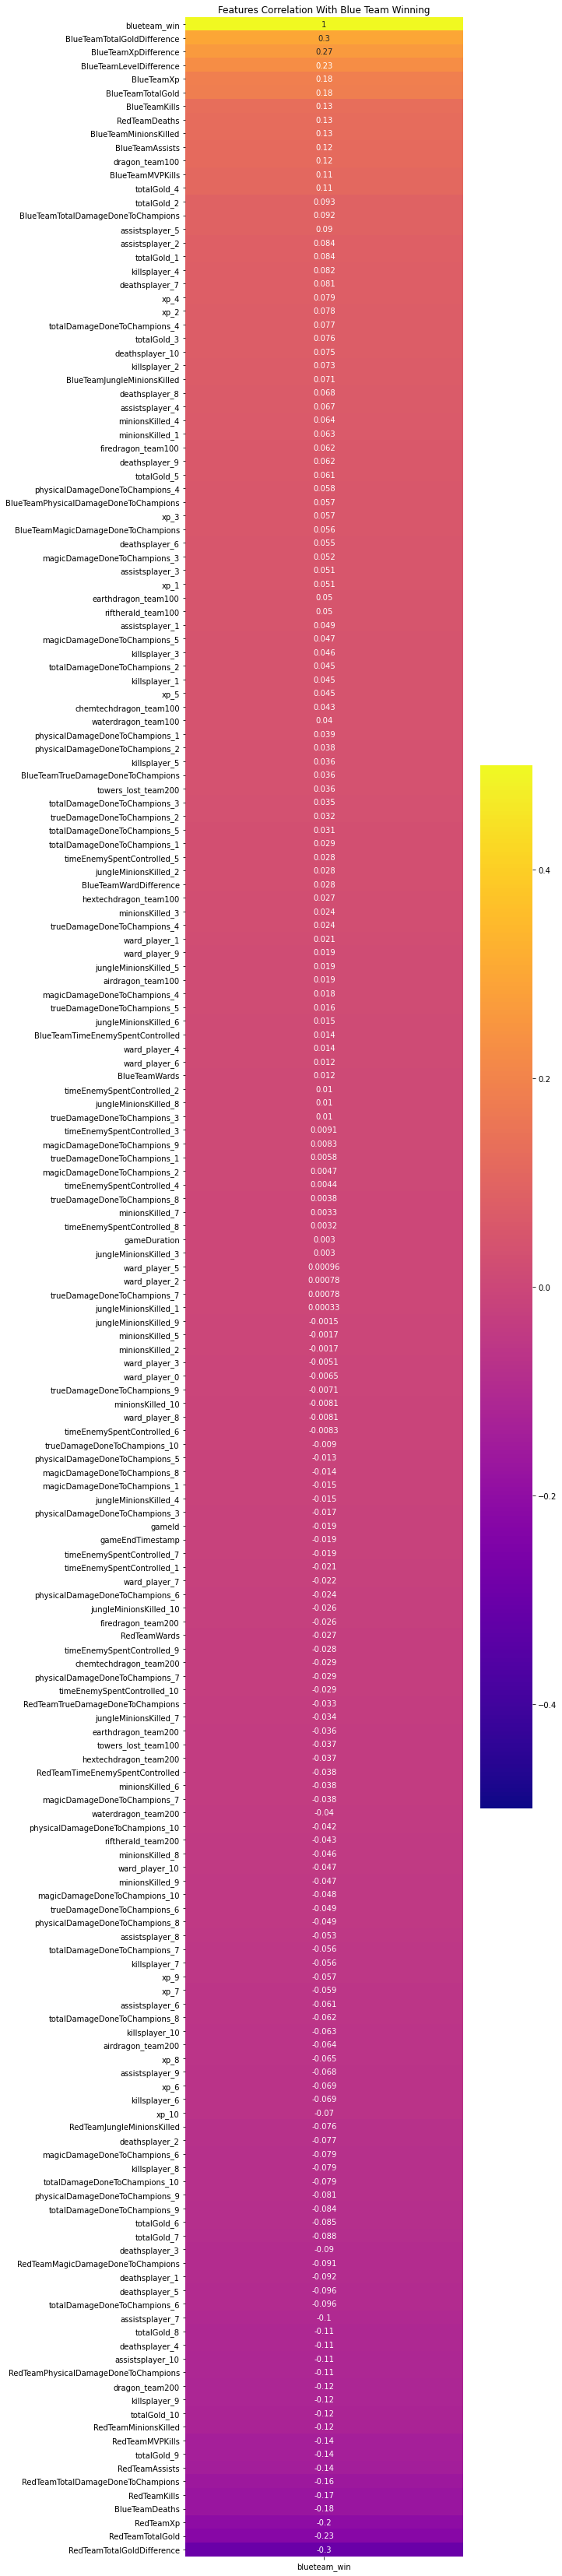

In [23]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['blueteam_win']].sort_values(by = 'blueteam_win',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

In [24]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['redteam_win']].sort_values(by = 'redteam_win',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With red Team Winning')

KeyError: "None of [Index(['redteam_win'], dtype='object')] are in the [columns]"

<Figure size 576x4320 with 0 Axes>